In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import scienceplots
from scipy.interpolate import interp2d
from scipy.signal.windows import hann
from scipy.signal import savgol_filter
%matplotlib inline

import sys
sys.path.append("/home/jonas/phd/NanoNets/src/")
sys.path.append("/mnt/c/Users/jonas/Desktop/phd/NanoNets/src/")

import nanonets_utils
import nanonets

# def fft(signal, step_size, factor=5):

#     n_0         = int(len(signal)/2)
#     signal_fft  = np.fft.fft(signal, factor*len(signal))
#     freq        = np.fft.fftfreq(factor*len(signal)) / step_size * 2 * np.pi

#     return freq[:n_0], np.abs(signal_fft[:n_0])

def fft(t, y):

    fft_result  = np.fft.fft(y)
    sample_rate = 1 / (t[1]-t[0])
    freqs       = np.fft.fftfreq(len(fft_result), d=1/sample_rate) / (2*np.pi)
    spectrum    = np.abs(fft_result)

    return freqs[:len(freqs)//2], spectrum[:len(spectrum)//2]

In [5]:
time_vals   = np.loadtxt("../uniform/time.csv")*1e9
time_vals   = np.delete(time_vals,-1)
dic_R       = {}

for seed in range(10):
    
    dic_R[seed] = {R_val : pd.read_csv(f"../R_dis/data/Nx=7_Ny=7_Nz=1_Ne=3_{R_val}_{seed}.csv") for R_val in [50,100,200,400,800]}

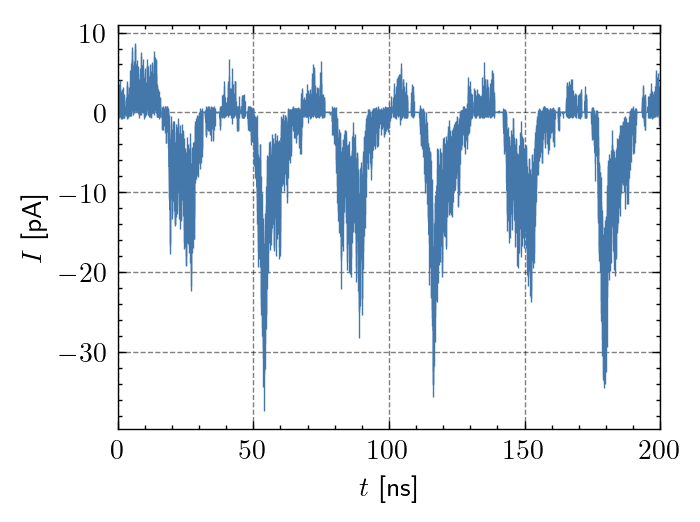

In [10]:
N = 7

with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    ax.errorbar(time_vals, dic_R[0][400]['Current'], dic_R[0][400]['Error'], marker='', markevery=2, lw=0.5)
    ax.set_ylabel('$I$ [pA]')
    ax.set_xlabel('$t$ [ns]')
    ax.set_xlim(0,200)

In [7]:
def plot_freq(f1, f2, ax, min_y, max_y):

    ax.vlines(f1, min_y, max_y, colors='#348ABD', linestyles='dashed')
    ax.vlines(f2, min_y, max_y, colors='#348ABD', linestyles='dashed')

    ax.vlines(f2-f1, min_y, max_y, colors='#A60628', linestyles='dotted')
    ax.vlines(f2+f1, min_y, max_y, colors='#A60628', linestyles='dotted')
    ax.vlines(2*f2, min_y, max_y, colors='#A60628', linestyles='dotted')
    ax.vlines(2*f1, min_y, max_y, colors='#A60628', linestyles='dotted')
    # ax.vlines(f2+2*f1, min_y, max_y, colors='#A60628', linestyles='dotted')
    # ax.vlines(f1+2*f2, min_y, max_y, colors='#A60628', linestyles='dotted')

    return ax

def nonlinear_index(f1,f2,xf,yf,delta):

    xf[f1]

In [36]:
xf, yf = fft(time_vals, dic_R[0][50]['Current'])

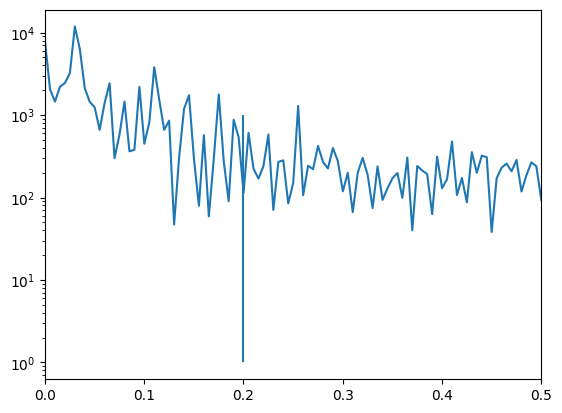

In [44]:
plt.plot(xf,yf)
plt.yscale('log')
plt.xlim(0,0.5)
plt.vlines(0.2,1,1000)

In [21]:
f1

0.2

In [22]:
xf[:10]

array([       0.        ,  3143164.23570765,  6286328.47141529,
        9429492.70712294, 12572656.94283059, 15715821.17853824,
       18858985.41424588, 22002149.64995353, 25145313.88566118,
       28288478.12136882])

In [28]:
delta = 1

# (xf/1e9 > f1 - delta) & (xf/1e9 < f1 + delta)

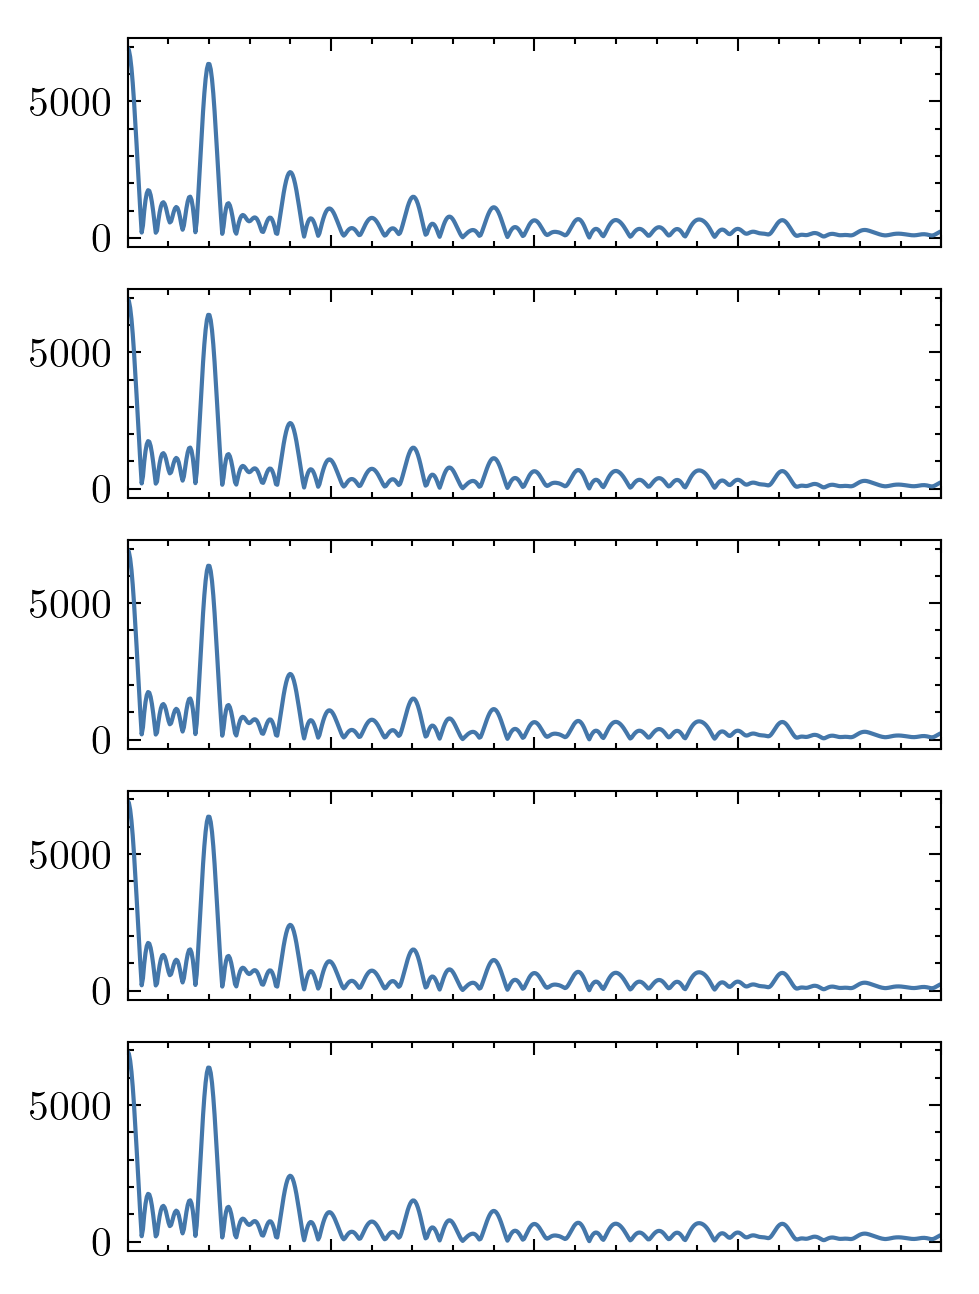

In [11]:
N       = 3
f1      = 20e7/1e9
f2      = 70e7/1e9
signal  = dic_R[0][400]['Current']
xf, yf  = fft(signal, 1e-10)

with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=300)
    fig.set_figheight(fig.get_figheight()*2)

    for i, N in enumerate([3,5,7,9,11]):

        ax  = fig.add_subplot(5,1,i+1)

        signal  = dic_R[0][400]['Current']
        xf, yf  = fft(signal, 1e-10, factor=10)

        ax.plot(xf/1e9, yf)
        # ax  = plot_freq(f1, f2, ax, 0, 1e5)
        # ax.set_yscale('log')
        ax.set_xlim(0,2)
        ax.set_xticklabels('')

    # plt.yscale('log')
    # plt.xlim(0,2)